In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
np.pi

3.141592653589793

In [3]:
nLayers = 15
idx_odd = torch.arange(1, nLayers, 2)
idx_even = torch.arange(0, nLayers, 2)

# layers width
D = torch.zeros(nLayers, dtype=torch.double)
D[idx_odd] = 102.74
D[idx_even] = 63.83
D

tensor([ 63.8300, 102.7400,  63.8300, 102.7400,  63.8300, 102.7400,  63.8300,
        102.7400,  63.8300, 102.7400,  63.8300, 102.7400,  63.8300, 102.7400,
         63.8300], dtype=torch.float64)

In [4]:
# retraction index
N = torch.zeros(nLayers, dtype=torch.double)
N[idx_odd] = 1.46
N[idx_even] = 2.35
N_a = 1.
N_s = 1.52
N

tensor([2.3500, 1.4600, 2.3500, 1.4600, 2.3500, 1.4600, 2.3500, 1.4600, 2.3500,
        1.4600, 2.3500, 1.4600, 2.3500, 1.4600, 2.3500], dtype=torch.float64)

In [5]:
# sample M
j = 1
lmda = 450
phi = 2 * np.pi * D[j] * N[j] / lmda

real = [[torch.cos(phi),0], [0, torch.cos(phi)]]
imag = [[0, torch.sin(phi) / N[j]], [torch.sin(phi) * N[j], 0]]

M = torch.complex(torch.tensor(real), torch.tensor(imag))
M

tensor([[-0.5000+0.0000j,  0.0000+0.5932j],
        [ 0.0000+1.2644j, -0.5000+0.0000j]], dtype=torch.complex128)

In [6]:
def LayerM(j, lmda, D, N):
    phi = 2 * np.pi * D[j] * N[j] / lmda
    real = [[torch.cos(phi),0], [0, torch.cos(phi)]]
    imag = [[0, torch.sin(phi) / N[j]], [torch.sin(phi) * N[j], 0]]
    return torch.complex(torch.tensor(real), torch.tensor(imag))

In [7]:
def CakeM(lmda, D, N):
    M = torch.eye(2, dtype=torch.complex128)
    for j in np.arange(nLayers-1, 0, -1):
        M_j = LayerM(j, lmda, D, N)
        M = M @ M_j
    return M

In [8]:
def Transmittance(M, N_a = 1., N_s = 1.52):
    return 2 * N_a / (N_a * M[0,0] + N_s * M[1,1] + N_a * N_s * M[0,1] + M[1,0])

In [9]:
def ETransmittance(M, N_a = 1., N_s = 1.52):
    t = Transmittance(M, N_a, N_s)
    return N_s * (t.real ** 2 + t.imag ** 2) / N_a

In [10]:
lambdas = torch.arange(350, 850, dtype=torch.double)
T = torch.zeros_like(lambdas)
for i, lmda in enumerate(lambdas):
    M = CakeM(lmda, D, N)
    T[i] = ETransmittance(M)

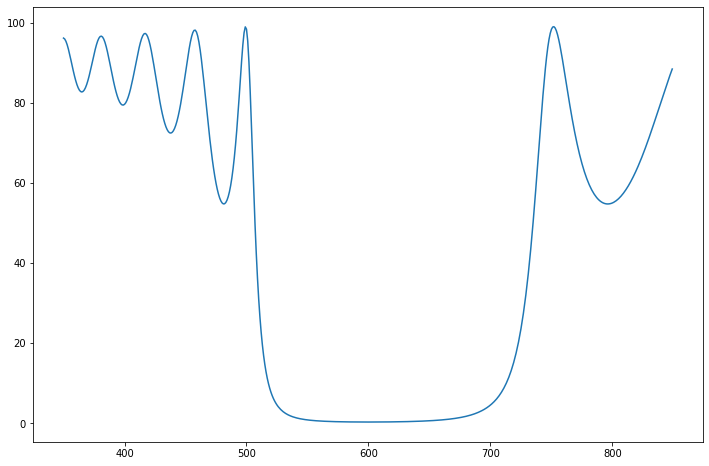

In [11]:
_=plt.plot(lambdas, 100*T)

In [12]:
100*T[::5]

tensor([96.1141, 92.0970, 85.5099, 82.6708, 85.5179, 92.0175, 96.4947, 93.9742,
        86.7741, 80.8489, 79.5806, 83.5038, 90.8431, 96.7304, 95.5328, 87.5907,
        78.6731, 73.2522, 72.9562, 78.0484, 87.4580, 96.4874, 96.6249, 85.3832,
        70.7700, 59.9334, 54.9942, 56.5463, 66.2794, 85.9722, 98.3322, 66.0432,
        31.0227, 14.7540,  7.8139,  4.5851,  2.9263,  1.9991,  1.4443,  1.0936,
         0.8619,  0.7035,  0.5921,  0.5122,  0.4542,  0.4120,  0.3814,  0.3600,
         0.3459,  0.3379,  0.3353,  0.3378,  0.3452,  0.3576,  0.3753,  0.3990,
         0.4295,  0.4680,  0.5162,  0.5762,  0.6510,  0.7445,  0.8618,  1.0103,
         1.1998,  1.4440,  1.7625,  2.1834,  2.7478,  3.5169,  4.5838,  6.0929,
         8.2713, 11.4814, 16.2993, 23.6077, 34.6017, 50.3271, 70.0011, 88.5463,
        98.3279, 96.9413, 88.9154, 79.4541, 71.1776, 64.7912, 60.2205, 57.1922,
        55.4404, 54.7571, 54.9933, 56.0457, 57.8416, 60.3245, 63.4400, 67.1209,
        71.2731, 75.7624, 80.4063, 84.97

# Optimization

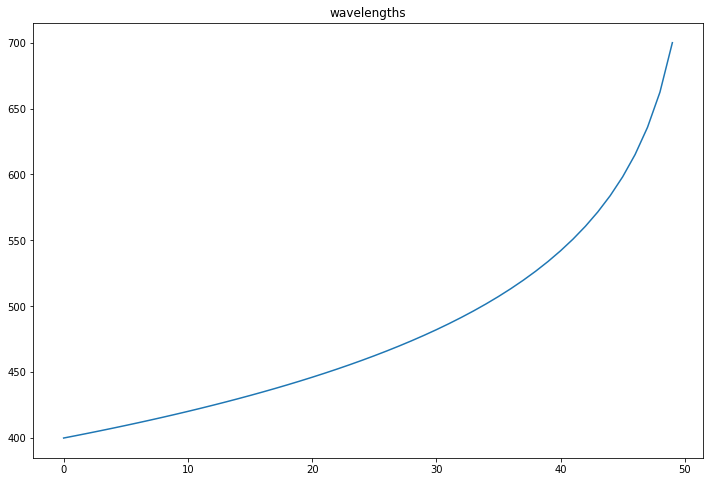

In [13]:
nPoints = 50
wavelengths = torch.log(1+torch.arange(nPoints, 0, -1))
wavelengths = (wavelengths[0] - wavelengths)
wavelengths *= 300 / wavelengths[-1]
wavelengths += 400
plt.plot(wavelengths)
_=plt.title('wavelengths')

In [14]:
wavelengths = wavelengths[(wavelengths < 540) | (wavelengths > 561)]
wavelengths, wavelengths.shape

(tensor([400.0000, 401.8343, 403.7057, 405.6157, 407.5659, 409.5580, 411.5939,
         413.6756, 415.8051, 417.9847, 420.2169, 422.5042, 424.8494, 427.2555,
         429.7258, 432.2638, 434.8733, 437.5584, 440.3237, 443.1741, 446.1150,
         449.1523, 452.2926, 455.5431, 458.9119, 462.4078, 466.0408, 469.8221,
         473.7645, 477.8820, 482.1912, 486.7107, 491.4620, 496.4702, 501.7649,
         507.3806, 513.3588, 519.7496, 526.6143, 534.0286, 571.5870, 583.9561,
         598.2351, 615.1237, 635.7935, 662.4416, 700.0000]),
 torch.Size([47]))

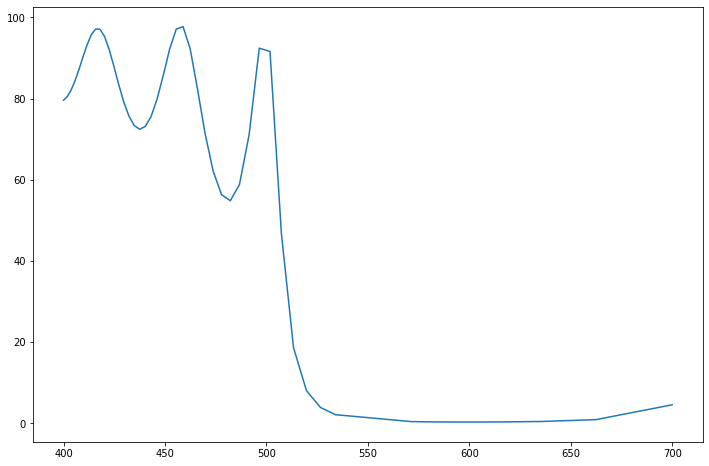

In [15]:
T = torch.zeros_like(wavelengths)
for i, lmda in enumerate(wavelengths):
    M = CakeM(lmda, D, N)
    T[i] = ETransmittance(M)
_=plt.plot(wavelengths, 100*T)

### Parameters to be optimized

In [18]:
parD = D.clone().detach().requires_grad_(True)
optD = parD * N
parD, optD

(tensor([ 63.8300, 102.7400,  63.8300, 102.7400,  63.8300, 102.7400,  63.8300,
         102.7400,  63.8300, 102.7400,  63.8300, 102.7400,  63.8300, 102.7400,
          63.8300], dtype=torch.float64, requires_grad=True),
 tensor([150.0005, 150.0004, 150.0005, 150.0004, 150.0005, 150.0004, 150.0005,
         150.0004, 150.0005, 150.0004, 150.0005, 150.0004, 150.0005, 150.0004,
         150.0005], dtype=torch.float64, grad_fn=<MulBackward0>))

In [19]:
def GetTE(wavelengths, parD):
    optD = parD * N
    TE_wavelengths = [None] * len(wavelengths)
    for i, lmda in enumerate(wavelengths):
        # M = torch.eye(2, dtype=torch.float64)
        M = [[1.,0.], [0.,1.]]
        for j in np.arange(nLayers-1, 0, -1):
            phi = 2 * np.pi * optD[j] / lmda
            M_j = [[torch.cos(phi), torch.sin(phi) / N[j]],
                   [torch.sin(phi) * N[j], torch.cos(phi)]]
            M_out = [[None, None], [None, None]]
            # M_out = M @ M_j
            M_out[0][0] =  M[0][0] * M_j[0][0] - M[0][1] * M_j[1][0]
            M_out[1][0] =  M[1][0] * M_j[0][0] + M[1][1] * M_j[1][0]
            M_out[0][1] =  M[0][0] * M_j[0][1] + M[0][1] * M_j[1][1]  
            M_out[1][1] = -M[1][0] * M_j[0][1] + M[1][1] * M_j[1][1]
            M = M_out

        # miltiplicative reverse of transmittance
        t_rev_real = N_a * M[0][0] + N_s * M[1][1]
        t_rev_imag = N_a * N_s * M[0][1] + M[1][0]
        t_rev_abs2 = t_rev_real ** 2 + t_rev_imag ** 2
        # transmittance
        t_abs2 = 4 * N_a * N_a * (t_rev_real ** 2 + t_rev_imag ** 2) / (t_rev_abs2 ** 2)
        TE = N_s * t_abs2 / N_a
        TE_wavelengths[i] = TE
    return TE_wavelengths

In [20]:
TE_wavelengths = GetTE(wavelengths, parD)

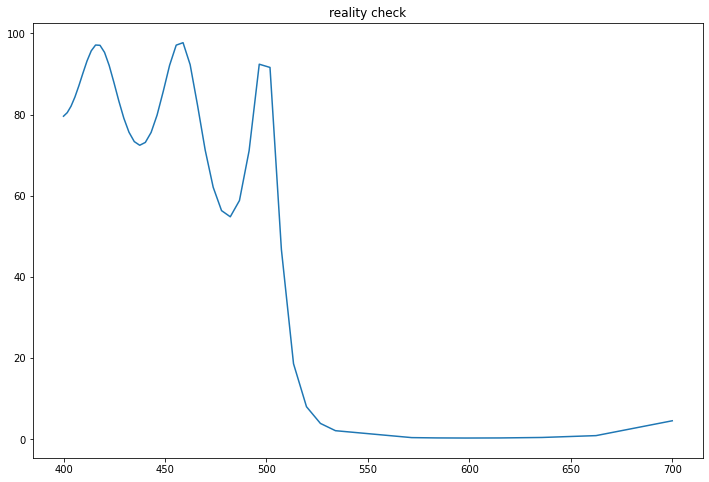

In [21]:
plt.plot(wavelengths, 100*torch.tensor(TE_wavelengths))
_=plt.title('reality check')

## Targets and Objective (merit) Function

In [43]:
targets = torch.zeros_like(wavelengths)
targets[wavelengths < 550] = 1
targets[wavelengths > 550] = 0
targets

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
def GetMerit(TE_wavelengths, targets):
    merit2 = (TE_wavelengths[0] - targets[0]) ** 2
    for i in range(1, len(targets)):
        merit2 += (TE_wavelengths[i] - targets[i]) ** 2
    return merit2 / len(TE_wavelengths)

### L-BFGS

In [49]:
parD = D.clone().detach().requires_grad_(True)

lbfgs = optim.LBFGS([parD],
                    history_size=5, 
                    max_iter=4, 
                    line_search_fn="strong_wolfe")
def closure():
    lbfgs.zero_grad()
    objective = GetMerit(GetTE(wavelengths, parD), targets)
    objective.backward()
    return objective

history_lbfgs = []
for i in range(20):
    history_lbfgs.append(GetMerit(GetTE(wavelengths, parD), targets).item())
    clear_output(wait=True)
    print (i, history_lbfgs[-1])
    lbfgs.step(closure)

19 0.0004771635309877493


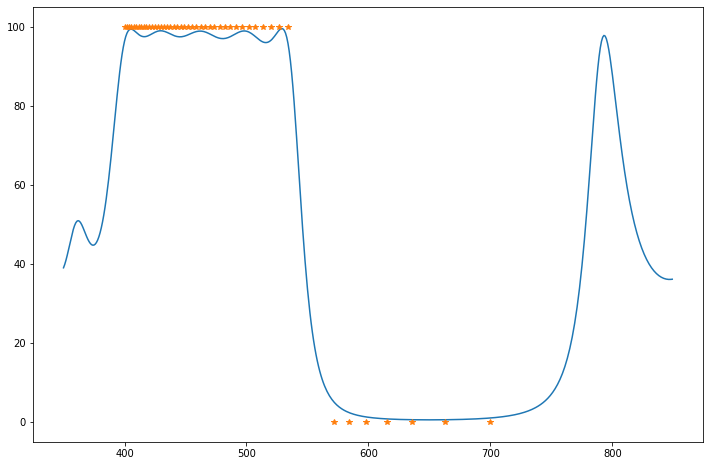

In [54]:
lambdas = torch.arange(350, 850, dtype=torch.double)
T = torch.zeros_like(lambdas)
for i, lmda in enumerate(lambdas):
    M = CakeM(lmda, parD, N)
    T[i] = ETransmittance(M)
plt.plot(lambdas, 100*T)
_=plt.plot(wavelengths, 100*targets, '*')

In [56]:
parD * N

tensor([150.0005, 210.5179, 198.8040, 158.8517, 167.7556, 157.1906, 175.8809,
        127.3153, 178.7838, 174.2800, 104.9622, 194.5584, 169.7854, 108.3266,
        221.3071], dtype=torch.float64, grad_fn=<MulBackward0>)